In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install japanize-matplotlib
import japanize_matplotlib

In [5]:
from sklearn.datasets import make_regression

In [6]:
X,Y,coef = make_regression(random_state=1,n_samples=100,n_features=1,n_informative=1,noise=100.0,bias=-0.0,coef=True)
data_prep = pd.DataFrame()

In [7]:
data_prep["X"] = (X[:,0] * 10000 + 40000) / 100000
data_prep["Y"] = Y * 0.001 + 0.1

In [8]:
data_prep = data_prep.query("X > 0.2 & Y > 0")
data = data_prep.query("X > 0.4 |Y < 0.15")

In [9]:
df = data
df.head()

,X,Y
0,0.338824,0.019808
1,0.375063,0.127197
2,0.448852,0.056073
3,0.476201,0.359471
4,0.551982,0.331027


Text(0, 0.5, '営業利益率')

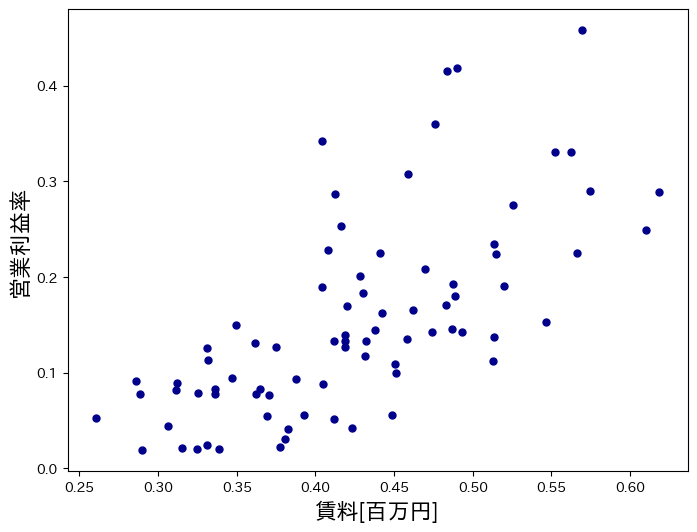

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data["X"],data["Y"],marker=".",s=100, c="darkblue")
plt.xlabel("賃料[百万円]", fontsize=16)
plt.ylabel("営業利益率", fontsize=16)

In [11]:
from sklearn.neighbors import NearestNeighbors

In [12]:
k = 1
nn = NearestNeighbors(n_neighbors=k + 1)

In [13]:
nn.fit(data)

NearestNeighbors(n_neighbors=2)

In [14]:
dist, ind = nn.kneighbors(data)

In [15]:
scores = dist[:,k]

C:\Users\imjot\AppData\Local\Temp\ipykernel_12676\1688072661.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["X"], data["Y"], c="b", s=4, cmap="jet")


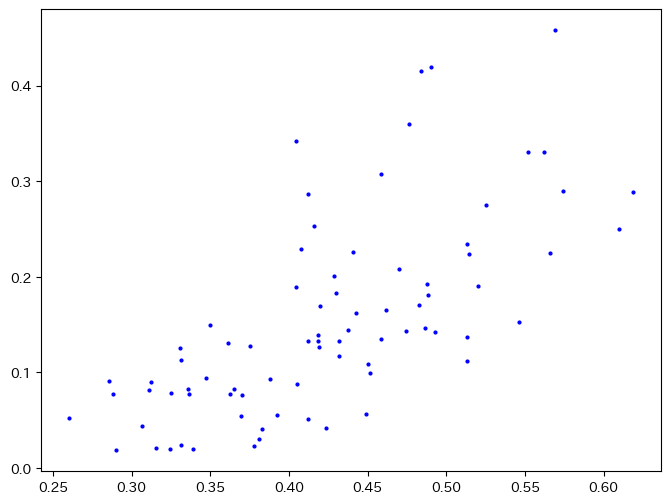

In [16]:
scores_minmax = (scores - scores.min()) / (scores.max() - scores.min())
plt.figure(figsize=(8,6))
plt.scatter(data["X"], data["Y"], c="b", s=4, cmap="jet")

Text(0, 0.5, '営業利益率')

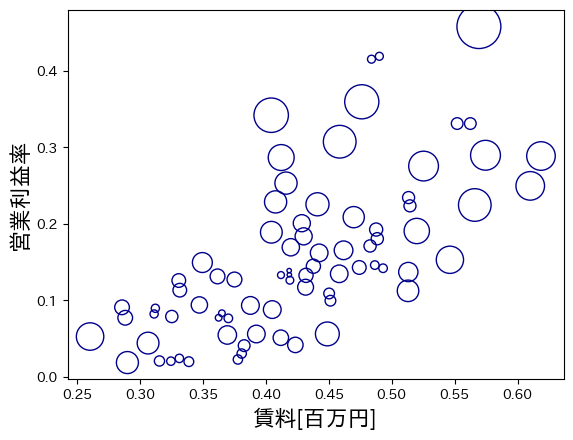

In [17]:
plt.scatter(data["X"], data["Y"], edgecolors="darkblue", s=scores_minmax * 1000, facecolors="none", label="Outlier scores")
plt.xlabel("賃料[百万円]", fontsize=16)
plt.ylabel("営業利益率", fontsize=16)

In [18]:
k = 2
nn = NearestNeighbors(n_neighbors=k + 1)

In [19]:
nn.fit(data)

NearestNeighbors(n_neighbors=3)

In [20]:
dist, ind = nn.kneighbors(data)

In [21]:
scores = dist[:,k]

C:\Users\imjot\AppData\Local\Temp\ipykernel_12676\1688072661.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data["X"], data["Y"], c="b", s=4, cmap="jet")


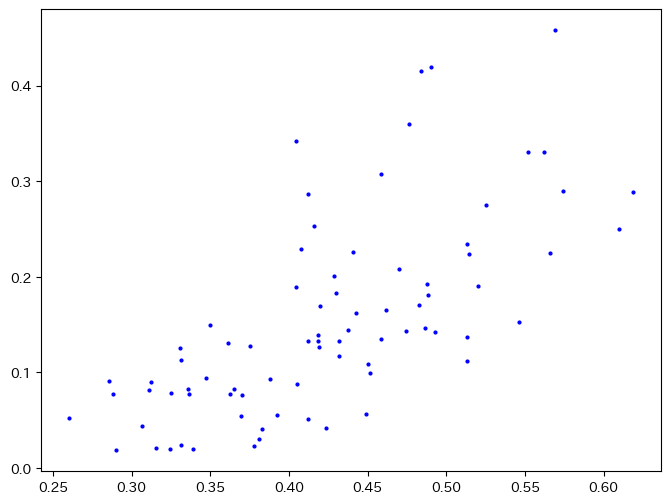

In [22]:
scores_minmax = (scores - scores.min()) / (scores.max() - scores.min())
plt.figure(figsize=(8,6))
plt.scatter(data["X"], data["Y"], c="b", s=4, cmap="jet")

Text(0, 0.5, '営業利益率')

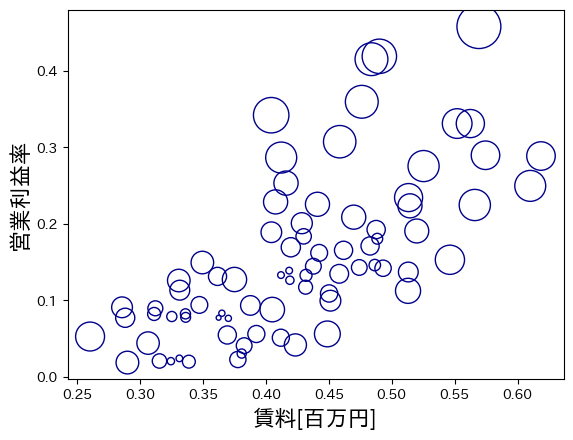

In [23]:
plt.scatter(data["X"], data["Y"], edgecolors="darkblue", s=scores_minmax * 1000, facecolors="none", label="Outlier scores")
plt.xlabel("賃料[百万円]", fontsize=16)
plt.ylabel("営業利益率", fontsize=16)

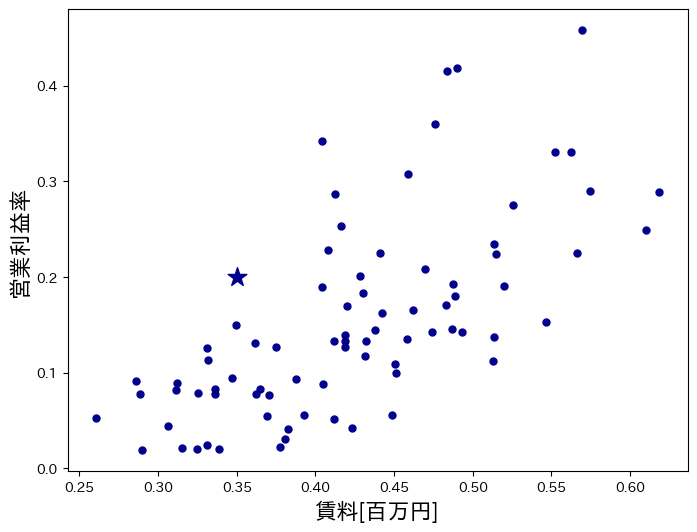

In [24]:
test_sample = pd.DataFrame([0.35, 0.2],index=data.columns).transpose()
plt.figure(figsize=(8,6))
plt.scatter(data["X"], data["Y"], marker=".", s=100, c="darkblue")
plt.scatter(test_sample["X"], test_sample["Y"], marker="*", s=200,c="darkblue")
plt.xlabel("賃料[百万円]", fontsize=16)
plt.ylabel("営業利益率", fontsize=16)
plt.show()

In [25]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=1)
nn.fit(data)

NearestNeighbors(n_neighbors=1)

In [26]:
dist_test, _ = nn.kneighbors(test_sample)
print(dist_test[0][0])

0.05063050690398735


c:\Users\imjot\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


AttributeError: Line2D.set() got an unexpected keyword argument 'makersize'

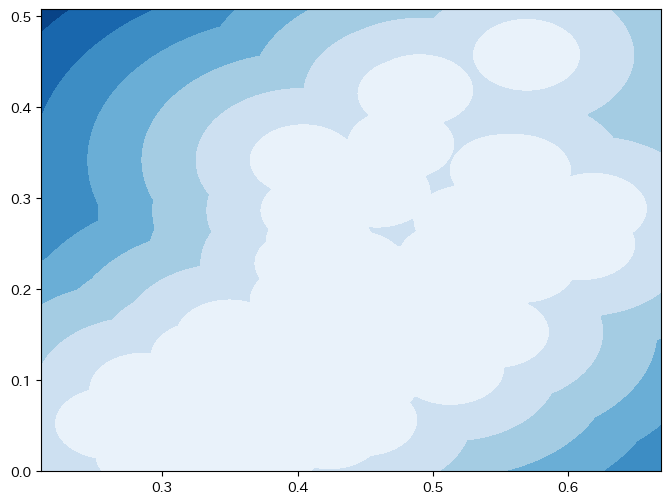

In [28]:
grid_x, grid_y = np.meshgrid(np.linspace(data.min()["X"] - 0.05, data.max()["X"] + 0.05, 1000), np.linspace(0,data.max()["Y"] + 0.05, 1000),)
density_score, _ = nn.kneighbors(np.c_[grid_x.ravel(), grid_y.ravel()])
density_score = density_score.reshape(grid_x.shape)
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, density_score, cmap=plt.cm.Blues,)
plt.plot(data["X"], data["Y"], "k.",makersize=2)
plt.scatter(test_sample["X"], test_sample["Y"], marker="*", s=100, c="darkblue")
plt.xlabel("賃料[百万円]", fontsize=16)
plt.ylabel("営業利益率", fontsize=16)
plt.show()